<a href="https://colab.research.google.com/github/anjanidwilestari/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np

# **PRAKTIKUM**

# Transformasi Linier Brightness 
Formula: *g(x,y)=f(x,y)+b* 

*g(x,y)* adalah nilai pixel setelah transformasi, *f(x,y)* adalah nilai pixel asli, b adalah nilai brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


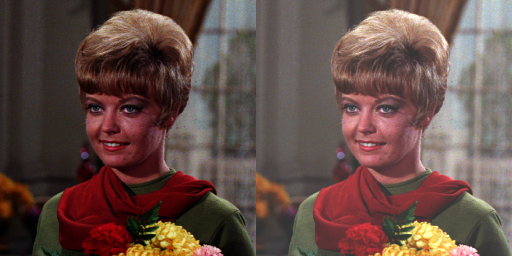

In [4]:
print(' Mengubah tingkat kecerahan citra ') 
print('----------------------------------') 
try: 
  brightness = int(input('Masukkan nilai kecerahan: ')) 
except ValueError: 
  print('Error, not a number') 

original = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/female.tiff') 
brightness_image = np.zeros(original.shape, original.dtype) 

#akses per piksel 
for y in range(original.shape[0]): 
  for x in range(original.shape[1]): 
    for c in range(original.shape[2]): 
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255) 

#cara simple tanpa for loop 
#brightness_image = cv.convertScaleAbs(original, beta=brightness) 

final_frame = cv.hconcat((original, brightness_image)) 
cv2_imshow(final_frame) 

# **TUGAS PRAKTIKUM**

1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan 
formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran 
seperti berikut:


# Transformasi Contrast
Formula: *g(x,y) = 𝑎 ∗ f(x,y) + b* 

*g(x,y)* adalah nilai pixel setelah transformasi, *f(x,y)* adalah nilai pixel asli, a adalah nilai contrast, dan b adalah nilai brightness

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


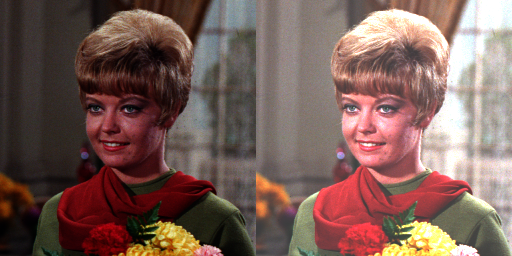

In [5]:
print(' Mengubah kontras dan tingkat kecerahan citra ') 
print('----------------------------------------------') 
try: 
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: ')) 
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: ')) 
except ValueError: 
  print('Error, not a number') 

original = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/female.tiff') 
contrast_image = np.zeros(original.shape, original.dtype) 

#akses per piksel 
for y in range(original.shape[0]): 
  for x in range(original.shape[1]): 
    for c in range(original.shape[2]): 
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255) 

final_frame = cv.hconcat((original, contrast_image)) 
cv2_imshow(final_frame) 

2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory 
menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga 
menghasilkan keluaran seperti berikut:


# Transformasi Logarithmic Brightness
Formula: *𝑠 = 𝑐 ∗ 𝑙𝑜𝑔(1 + 𝑟)* 

c adalah konstanta, r adalah nilai grey-level citra input, dan s adalah nilai grey-level citra output

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


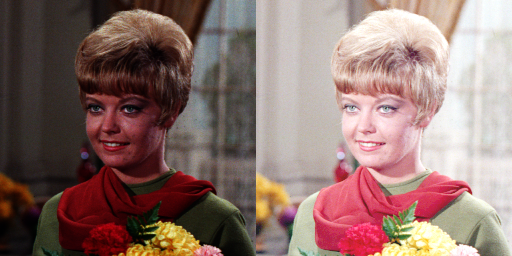

In [6]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ') 
print('----------------------------------------------------------') 
try: 
  konstanta = int(input('Masukkan nilai kecerahan: ')) 
except ValueError: 
  print('Error, not a number') 

original = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/female.tiff') 
brightness_image = np.zeros(original.shape, original.dtype) 

#akses per piksel 
for y in range(original.shape[0]): 
  for x in range(original.shape[1]): 
    for c in range(original.shape[2]): 
      brightness_image[y,x,c] = np.clip(konstanta * (np.log(1 + original[y,x,c])), 0, 255) 

final_frame = cv.hconcat((original, brightness_image)) 
cv2_imshow(final_frame) 

3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, 
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada 
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

# Transformasi Grayscale
Averaging = (𝑅 + 𝐺 + 𝐵) / 3

Lightness = (max[𝑅, 𝐺, 𝐵] + min[𝑅, 𝐺, 𝐵]) / 2

Luminance = 0.21𝑅 + 0.72𝐺 + 0.07B

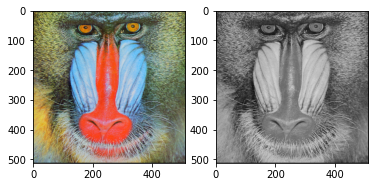

In [7]:
# Averaging
original = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/mandrill.tiff')
original = cv.cvtColor(original,cv.COLOR_BGR2RGB) 

img_avg = np.array(original)
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)

fig, ax = plt.subplots(1,2)
ax[0].imshow(original)
ax[1].imshow(img_avg)

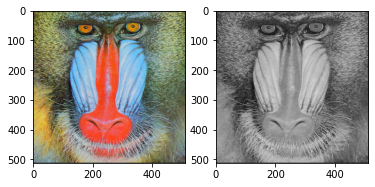

In [8]:
# Lightness
original = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/mandrill.tiff')
original = cv.cvtColor(original,cv.COLOR_BGR2RGB)

img_lightness = np.array(original)
img_lightness[:] = np.max(img_lightness,axis=-1, keepdims=1)/2 + np.min(img_lightness,axis=-1, keepdims=1)/2

fig, ax = plt.subplots(1,2)
ax[0].imshow(original)
ax[1].imshow(img_lightness)

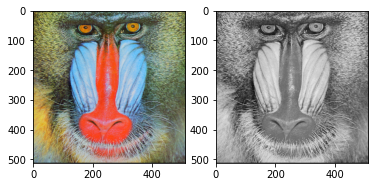

In [9]:
# Luminance
original = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/mandrill.tiff')
original = cv.cvtColor(original,cv.COLOR_BGR2RGB)

R, G, B = original[:,:,0], original[:,:,1], original[:,:,2]
img_luminance = (0.21 * R) + (0.72 * G) + (0.07 * B)

fig, ax = plt.subplots(1,2)
ax[0].imshow(original)
ax[1].imshow(img_luminance, cmap='gray')

4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, 
tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna 
merah menjadi grayscale seperti pada contoh berikut:

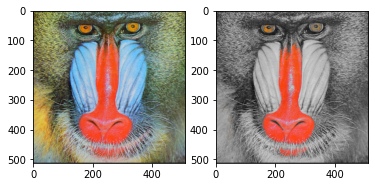

In [10]:
# Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale
original = cv.imread('/content/drive/MyDrive/PCVK_AD/Images/mandrill.tiff')
original = cv.cvtColor(original,cv.COLOR_BGR2RGB)

one_color = np.array(original)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        if (one_color[y,x,0] < 200 or one_color[y,x,1] > 140):
            one_color[y,x]= np.mean(one_color[y,x])

fig, ax = plt.subplots(1,2)
ax[0].imshow(original)
ax[1].imshow(one_color)